In [22]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed



# Dataset BRUT

In [10]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [27]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
299,1.710190,1.846649,1.153534,2.403305,2.023819,1.614410,-1.014420,5.680969,4.285156,-3.205109,...,1.001343,5.028381,10.875031,10.582932,11.412521,7.839172,9.847916,0,0,1
218,-0.603806,-0.994064,-1.518402,-1.070679,-1.334045,0.083328,-0.405090,-0.317703,-1.654861,-1.272995,...,3.725937,2.893951,2.562363,2.387589,2.621017,2.661713,2.915497,0,0,1
343,0.691452,0.863831,0.778839,0.854263,0.740540,0.839890,0.777649,0.829117,0.701035,0.833908,...,8.595749,8.635254,8.632858,8.538284,8.614899,8.582581,8.550262,0,0,1
526,-1.343613,-1.826050,-2.940552,-3.952103,-3.660004,-2.241440,-7.217789,-8.414886,-1.134125,2.707367,...,2.832901,0.800232,-2.077606,32.072098,-0.936768,-14.862640,35.643051,0,0,1
560,0.157547,0.103683,1.558151,0.914108,0.162338,1.214584,2.581680,3.044952,0.721375,-1.363968,...,3.135773,3.877975,2.467789,2.694046,3.964157,4.757843,3.492508,0,0,1
36,9.849274,12.691193,10.191650,13.214325,10.617813,10.516052,8.701248,5.611542,3.024597,1.807144,...,17.935532,13.125580,6.675598,5.054718,2.598267,2.537216,1.535248,0,0,1
195,1.005096,0.862640,-0.104614,0.056992,0.365845,0.004318,-0.233902,-0.010056,-0.083069,0.059387,...,5.982483,3.759460,2.034439,1.556793,1.555603,1.897964,1.678894,0,0,1
209,-0.145325,0.489136,-0.054337,0.021072,-0.180038,-0.682816,-0.359604,-0.095047,0.110855,-0.336853,...,2.653336,3.013672,2.964584,2.391174,4.475327,1.000137,2.374420,0,0,1
180,2.036987,0.726166,0.179092,0.170715,0.229370,1.418091,0.733353,0.394577,0.516678,2.345840,...,4.209564,4.551941,4.162888,3.510468,3.900711,3.583481,3.709183,0,0,1
228,0.507095,0.079727,0.066559,0.027069,0.156342,2.004669,-0.329681,-1.579453,-0.721130,-0.403900,...,1.941071,1.623825,0.308212,1.619049,3.915085,5.448563,3.582291,0,0,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
334,0.645966,1.321121,0.692657,1.093674,0.568146,1.318741,0.514282,1.019455,0.727371,1.027832,...,8.561035,8.669968,8.626877,8.586166,8.624481,8.657990,8.727432,0,0,1
458,-1.785355,-1.274185,-1.002441,-0.991669,-0.934204,-0.855194,-1.227493,0.422104,-0.251862,-1.067093,...,9.069794,8.534698,7.027542,7.555466,8.745392,9.987976,10.507523,0,0,1
439,-9.281601,-9.515030,-9.935211,-11.049713,-11.286743,-13.653412,-9.705368,-10.538544,-10.266815,-6.029068,...,1.862061,0.585953,1.943451,2.217590,2.480957,2.638977,2.759888,0,0,1
278,-1.086243,-1.025192,-0.921036,-0.713943,-0.202774,0.866226,-3.020752,0.486755,-3.480438,-2.404251,...,-1.529327,12.772430,-1.286316,-1.449127,1.999725,0.785858,-2.623474,0,0,1
248,-0.109406,-0.616974,0.284439,0.062973,2.616394,-11.151459,3.305923,-0.484100,-1.365173,1.731735,...,5.265411,6.066269,-1.572433,7.191544,10.258514,7.354355,4.319702,0,0,1
318,1.960373,2.664276,1.819122,2.378174,3.724899,2.396118,5.665405,2.306335,4.371338,0.563370,...,9.604904,10.020294,8.033112,3.727142,0.872055,12.710190,7.198730,0,0,1
474,0.574142,-0.035187,0.112061,-0.042374,0.153961,0.296402,-0.263840,-2.206726,-4.367493,-2.508392,...,-5.545609,-10.175995,-3.485397,-2.314636,1.305405,1.480179,-0.217316,0,0,1
406,-0.821686,-0.068710,-1.004837,-1.152084,-0.290176,-0.345230,2.130371,3.279587,4.872925,4.953125,...,-7.257462,2.060776,1.294632,1.024078,1.265900,1.128235,1.221603,0,0,1
266,1.069733,0.606461,0.073746,0.619629,0.938049,0.325134,-0.664856,-0.151306,-5.481995,-7.015488,...,-2.010559,-8.345627,-7.323303,6.815659,-2.898819,-0.444763,-3.093948,0,0,1
133,0.859055,1.003891,0.671097,1.057770,-7.787613,-34.102280,-26.100861,-17.696014,-39.862732,-39.856750,...,0.123871,-1.699326,-5.151764,5.252243,6.840805,-10.414215,-7.325699,0,0,1


,Action
299,Courrir
218,Se lever (chaise)
343,Ne rien faire
526,Courrir
560,S'assoir (depuis position allongée)
36,Se lever (depuis position allongée)
195,S'assoir (chaise)
209,Se lever (chaise)
180,S'assoir (chaise)
228,Se lever (chaise)


,Action
334,Ne rien faire
458,Marcher
439,S'assoir (depuis position allongée)
278,S'allonger (depuis position debout)
248,Sauter
318,Courrir
474,S'allonger (depuis position debout)
406,S'allonger (depuis position assise)
266,S'allonger (depuis position debout)
133,Sauter


In [13]:
import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')

hidden_layer_sizes = []
'''
Les range sont choisi à partir d'une méthode itérative ayant indiqué que (95, 68, 78) 
était le meilleur parametre possible
Là on tene un +/- 20
'''
a = np.array(range (1,20))
a = a*10

for i in a : 
    hidden_layer_sizes.append((i,))
    for j in a :
        hidden_layer_sizes.append((i,j))
        #for k in range (58,98) :
        #    hidden_layer_sizes.append((i,j, k))

In [14]:
# affichage des couches de neurones que l'on aura
hidden_layer_sizes

[(10,),
 (10, 10),
 (10, 20),
 (10, 30),
 (10, 40),
 (10, 50),
 (10, 60),
 (10, 70),
 (10, 80),
 (10, 90),
 (10, 100),
 (10, 110),
 (10, 120),
 (10, 130),
 (10, 140),
 (10, 150),
 (10, 160),
 (10, 170),
 (10, 180),
 (10, 190),
 (20,),
 (20, 10),
 (20, 20),
 (20, 30),
 (20, 40),
 (20, 50),
 (20, 60),
 (20, 70),
 (20, 80),
 (20, 90),
 (20, 100),
 (20, 110),
 (20, 120),
 (20, 130),
 (20, 140),
 (20, 150),
 (20, 160),
 (20, 170),
 (20, 180),
 (20, 190),
 (30,),
 (30, 10),
 (30, 20),
 (30, 30),
 (30, 40),
 (30, 50),
 (30, 60),
 (30, 70),
 (30, 80),
 (30, 90),
 (30, 100),
 (30, 110),
 (30, 120),
 (30, 130),
 (30, 140),
 (30, 150),
 (30, 160),
 (30, 170),
 (30, 180),
 (30, 190),
 (40,),
 (40, 10),
 (40, 20),
 (40, 30),
 (40, 40),
 (40, 50),
 (40, 60),
 (40, 70),
 (40, 80),
 (40, 90),
 (40, 100),
 (40, 110),
 (40, 120),
 (40, 130),
 (40, 140),
 (40, 150),
 (40, 160),
 (40, 170),
 (40, 180),
 (40, 190),
 (50,),
 (50, 10),
 (50, 20),
 (50, 30),
 (50, 40),
 (50, 50),
 (50, 60),
 (50, 70),
 (50, 8

In [15]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.2s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(10, 110) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 30) .....................................
[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 180) ....................................
[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] .

[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 130) ....................................
[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 80) .....................................
[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] .

[CV] ............................... hidden_layer_sizes=(80,) -   0.2s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.2s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.2s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.2s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.2s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.3s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.3s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] ............................ hidden_layer_sizes=(90, 50) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(110,) .......................................
[CV] .

[CV] .......................... hidden_layer_sizes=(110, 100) -   0.4s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.3s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.3s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(120, 10) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.4s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .......................... hidden_layer_sizes=(160, 160) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.4s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .......................... hidden_layer_sizes=(190, 140) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  6.7min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(110, 120), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.373 (+/-0.047) for {'hidden_layer_sizes': (10,)}
0.343 (+/-0.038) for {'hidden_layer_sizes': (10, 10)}
0.491 (+/-0.044) for {'hidden_layer_sizes': (10, 20)}
0.456 (+/-0.030) for {'hidden_layer_sizes': (10, 30)}
0.527 (+/-0.024) for {'hidden_layer_sizes': (10, 40)}
0.550 (+/-0.029) for {'hidden_layer_sizes': (10, 50)}
0.621 (+/-0.028) for {'hidden_layer_sizes': (10, 60)}
0.562 (+/-0.050) for {'hidden_layer_sizes': (10, 70)}
0.538 (+/-0.051) for {'hidden_layer_sizes': (10, 80)

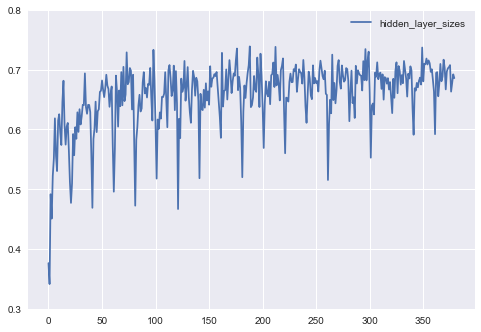

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


# Configuration des valeurs utilisées sur l'axe des abscisses

scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]


# Configuration de la présentation des axes
plt.ylim([0.3,0.8])

axes = plt.gca()




    
plt.plot(scores)
plt.legend(['hidden_layer_sizes'])



In [ ]:
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
clf.fit(source_train, cible_train.values.ravel())

In [ ]:
for i in range(0,10):
    print("prédit : ", clf.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


# Dataset ANALYSE

In [23]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [26]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
0,0.635193,0.562164,0.283249,0.328735,0.045013,-1.713516,-2.079834,-0.962936,-2.556274,-1.428619,...,13.272827,13.272827,-2.556274,-0.984238,7.272949,-2.556274,1.018144,2.074506,1.466472,4.316505
517,0.334717,-0.259048,-0.784576,-2.732254,-1.162857,0.412521,0.155151,0.327530,0.052200,1.380981,...,12.634766,12.634766,-5.686707,3.889160,5.272598,-5.686707,1.750985,1.327671,1.878489,4.073472
505,-0.013641,0.053391,-0.111801,0.237747,0.517868,0.752502,0.580124,-0.220734,0.422104,-0.213562,...,10.813980,10.813980,-0.346436,4.865997,5.241470,-0.346436,0.301872,1.114262,1.731257,3.493818
154,-0.584656,0.059387,-0.372772,-0.140533,0.355072,-0.463745,-0.345230,-1.076660,-1.900269,-2.193558,...,12.082901,12.082901,-2.193558,1.889999,5.611374,-2.193558,0.721098,1.158770,1.775422,4.018085
158,-6.298416,-9.034988,-7.985138,-6.120056,-6.261307,-7.800781,-6.656357,-7.469177,-8.896133,-8.203003,...,7.496811,7.496811,-9.834656,-14.805954,-0.858948,-14.805954,1.956447,2.676718,2.252437,5.495299
378,-9.949570,-9.461166,-8.595657,-10.406876,-12.001404,-11.078445,-9.601227,-10.548126,-9.718536,-6.736557,...,11.140778,11.140778,-12.001404,-0.015778,-2.539688,-12.001404,4.539469,3.102969,4.197097,6.026837
424,-9.495880,-9.651505,-9.795151,-9.702972,-9.513824,-10.056122,-13.892822,-14.008942,-14.317795,-9.169067,...,5.629333,9.964447,-14.317795,-1.646225,-1.657425,-14.317795,5.360668,4.558843,1.989296,5.915886
42,9.632599,10.198822,10.613022,11.786179,11.515640,12.029190,9.125031,7.931519,6.087982,3.519012,...,5.871140,12.029190,-1.757813,0.223633,0.226822,-1.757813,5.219849,3.515000,1.936231,3.792053
212,0.788422,-0.203979,-0.263840,-0.268616,0.491531,-2.534729,-0.819290,-1.049133,0.538223,-1.865555,...,5.126556,10.768906,-2.534729,8.422577,0.441101,-2.534729,0.825962,0.526099,1.178366,4.216196
304,1.248108,1.503082,0.040237,-1.810486,2.051361,-5.924927,1.825104,2.866592,3.893692,-1.592621,...,13.572098,13.572098,-5.924927,3.076324,-0.947540,-5.924927,3.026254,2.493072,3.852922,4.468083


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
440,9.897156,8.708435,9.247131,10.258682,11.611404,11.107422,10.116226,16.409393,9.874420,0.192261,...,6.901855,16.409393,-3.452911,-3.440689,-2.604324,-3.452911,6.286037,5.763806,2.459827,5.090417
27,0.645966,-0.449387,-1.286163,-1.577057,-2.334824,-1.561493,-1.074265,1.495911,5.223679,-5.128845,...,7.849960,18.146378,-5.128845,-8.109375,-9.031555,-9.031555,6.496449,6.161072,4.317623,5.724076
43,10.550781,12.084259,9.394379,8.850891,8.650970,11.201996,11.460571,14.983643,11.615005,9.177704,...,6.269775,14.983643,-5.498749,0.059631,-0.322647,-5.498749,6.950879,3.454734,1.785144,4.639693
481,-0.145325,-0.533188,-0.251862,-0.023224,1.214584,1.659912,1.767639,2.725327,3.146713,5.404434,...,5.995651,11.006866,-0.533188,0.240402,-3.426743,-3.426743,4.471700,3.683558,2.802740,3.969791
256,-1.264603,-1.102997,-0.770203,-0.007660,-0.663666,-0.158493,0.006714,-0.279388,-2.472488,-0.820480,...,16.046509,16.046509,-5.659164,-0.609543,0.490173,-5.659164,2.114455,2.786207,3.493356,5.084136
299,1.710190,1.846649,1.153534,2.403305,2.023819,1.614410,-1.014420,5.680969,4.285156,-3.205109,...,13.968338,13.968338,-4.846329,-0.465897,1.001343,-4.846329,2.639753,3.507366,3.363394,4.065375
544,0.345490,0.981155,0.351471,0.392181,0.851868,0.419708,-0.132156,-1.555511,-2.212708,-4.530304,...,5.581451,15.879318,-23.243378,2.494537,-6.189651,-23.243378,6.224353,2.886624,4.254461,6.768798
56,0.067764,0.420914,-0.286575,-0.254257,0.198242,-0.047165,0.200638,0.237747,0.753708,0.094101,...,5.224716,9.382660,-0.812103,0.682129,-12.185928,-12.185928,0.632186,3.252027,7.009513,5.834202
84,-0.060333,-0.086670,-0.095047,-0.044769,-0.074692,-0.110611,-0.102219,-0.063919,-0.083069,-0.126160,...,4.780594,9.017548,-0.126160,8.871490,3.992889,-0.126160,0.026370,0.033996,0.177524,3.721805
171,0.139587,-0.047165,0.068954,-0.346436,0.383804,-0.569092,-0.129761,0.459213,-0.084274,-0.237503,...,7.806854,9.535889,-0.688797,6.824448,4.198792,-0.688797,0.354655,0.724037,1.073352,3.500254


,Action
0,Se lever (chaise)
517,Marcher
505,Se lever (chaise)
154,Marcher
158,Marcher
378,Se lever (depuis position allongée)
424,S'assoir (depuis position allongée)
42,S'assoir (depuis position allongée)
212,Se lever (chaise)
304,Courrir


,Action
440,S'assoir (depuis position allongée)
27,S'allonger (depuis position debout)
43,S'assoir (depuis position allongée)
481,S'allonger (depuis position assise)
256,Sauter
299,Courrir
544,S'allonger (depuis position assise)
56,S'allonger (depuis position assise)
84,Ne rien faire
171,S'assoir (chaise)


In [28]:
import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')

hidden_layer_sizes = []
'''
Les range sont choisi à partir d'une méthode itérative ayant indiqué que (95, 68, 78) 
était le meilleur parametre possible
Là on tene un +/- 20
'''
a = np.array(range (1,20))
a = a*10

for i in a : 
    hidden_layer_sizes.append((i,))
    for j in a :
        hidden_layer_sizes.append((i,j))
        #for k in range (58,98) :
        #    hidden_layer_sizes.append((i,j, k))

In [29]:
hidden_layer_sizes

[(10,),
 (10, 10),
 (10, 20),
 (10, 30),
 (10, 40),
 (10, 50),
 (10, 60),
 (10, 70),
 (10, 80),
 (10, 90),
 (10, 100),
 (10, 110),
 (10, 120),
 (10, 130),
 (10, 140),
 (10, 150),
 (10, 160),
 (10, 170),
 (10, 180),
 (10, 190),
 (20,),
 (20, 10),
 (20, 20),
 (20, 30),
 (20, 40),
 (20, 50),
 (20, 60),
 (20, 70),
 (20, 80),
 (20, 90),
 (20, 100),
 (20, 110),
 (20, 120),
 (20, 130),
 (20, 140),
 (20, 150),
 (20, 160),
 (20, 170),
 (20, 180),
 (20, 190),
 (30,),
 (30, 10),
 (30, 20),
 (30, 30),
 (30, 40),
 (30, 50),
 (30, 60),
 (30, 70),
 (30, 80),
 (30, 90),
 (30, 100),
 (30, 110),
 (30, 120),
 (30, 130),
 (30, 140),
 (30, 150),
 (30, 160),
 (30, 170),
 (30, 180),
 (30, 190),
 (40,),
 (40, 10),
 (40, 20),
 (40, 30),
 (40, 40),
 (40, 50),
 (40, 60),
 (40, 70),
 (40, 80),
 (40, 90),
 (40, 100),
 (40, 110),
 (40, 120),
 (40, 130),
 (40, 140),
 (40, 150),
 (40, 160),
 (40, 170),
 (40, 180),
 (40, 190),
 (50,),
 (50, 10),
 (50, 20),
 (50, 30),
 (50, 40),
 (50, 50),
 (50, 60),
 (50, 70),
 (50, 8

In [30]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] ............................ hidden_layer_sizes=(20, 50) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 180) ....................................
[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] .

[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] ........................... hidden_layer_sizes=(50, 150) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.2s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 80) .....................................
[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] .

[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] ............................ hidden_layer_sizes=(90, 50) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(90, 150) -   0.3s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(110,) .......................................
[CV] .

[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(120, 10) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(120, 130) -   0.3s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.3s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(130, 160) -   0.2s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 140) ...................................
[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(170, 170) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.4s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.2s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 120) ...................................
[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.4s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.4s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.4s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  6.6min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(120, 130), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.379 (+/-0.074) for {'hidden_layer_sizes': (10,)}
0.361 (+/-0.040) for {'hidden_layer_sizes': (10, 10)}
0.550 (+/-0.022) for {'hidden_layer_sizes': (10, 20)}
0.521 (+/-0.056) for {'hidden_layer_sizes': (10, 30)}
0.609 (+/-0.029) for {'hidden_layer_sizes': (10, 40)}
0.586 (+/-0.021) for {'hidden_layer_sizes': (10, 50)}
0.686 (+/-0.022) for {'hidden_layer_sizes': (10, 60)}
0.627 (+/-0.034) for {'hidden_layer_sizes': (10, 70)}
0.663 (+/-0.022) for {'hidden_layer_sizes': (10, 80)

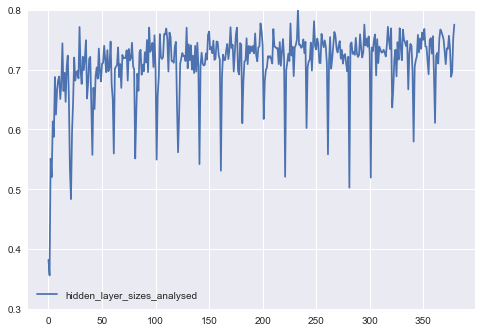

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


# Configuration des valeurs utilisées sur l'axe des abscisses

scores_analysed = [ mean_score.mean() for params, mean_score, mean_score in clf_analysed.grid_scores_ ]


# Configuration de la présentation des axes
plt.ylim([0.3,0.8])

axes = plt.gca()




    
plt.plot(scores_analysed)
plt.legend(['hidden_layer_sizes_analysed'])



In [ ]:
# TODO copier coller le best classifier
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
clf.fit(source_train, cible_train.values.ravel())

In [ ]:
for i in range(0,10):
    print("prédit : ", clf.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])
